In [1]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
from keras import backend as K
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Activation, Layer
from keras.layers import Conv2D, MaxPooling2D, Flatten, MaxPool2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.models import load_model, model_from_json
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline 

Using TensorFlow backend.


In [7]:
output_shape = 10
#加载 模型，要让compile是True，后面才能去使用模型进行预测
my_model = load_model('my_dogs_vs_cats_model.h5', compile=False)

my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
Block1_Conv1 (Conv2D)        (None, 128, 128, 32)      896       
_________________________________________________________________
Block1_Conv2 (Conv2D)        (None, 128, 128, 32)      9248      
_________________________________________________________________
Block1_MaxPool (MaxPooling2D (None, 64, 64, 32)        0         
_________________________________________________________________
Block2_Conv1 (Conv2D)        (None, 64, 64, 64)        18496     
_________________________________________________________________
Block2_Conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
Block2_MaxPool (MaxPooling2D (None, 32, 32, 64)        0         
__________

===img_tensor.shape===
 (1, 128, 128, 3)
===img_tensor[0].shape===
 (128, 128, 3)


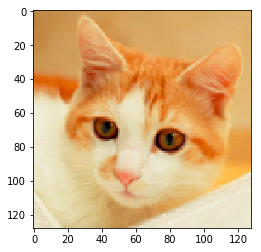

In [11]:
img_filepath = 'cat02.jpg'
img = image.load_img(img_filepath, target_size=(128, 128))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0
print('===img_tensor.shape===\n', img_tensor.shape)
print('===img_tensor[0].shape===\n', img_tensor[0].shape)
plt.imshow(img_tensor[0])  # img_tensor[0]代表minibatch中的第一张图片
plt.show()

In [8]:
# 在原来的CNN里，就只有1-6层是矩形的，第0层是input层，但是输入不能同时是输出。
# 把每一层的输出都装到列表里
layer_outputs = [layer.output for layer in my_model.layers[1:7]]

#利用加载的模型创建新的模型，一个输入，多个输出
activation_model = Model(inputs=my_model.input, outputs=layer_outputs)


In [12]:
# 用my_model就能够predict(), 用activation_model就不行
acitvations = activation_model.predict(img_tensor, 1)
#acitvations就是activation_model模型运行后存储的每一层的结果

(1, 128, 128, 32)


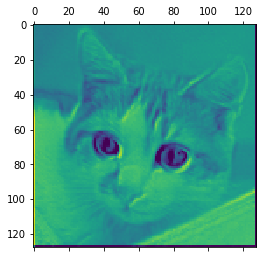

In [13]:
first_layer_activation = acitvations[0]
print(first_layer_activation.shape)
#for i in rang(32):
plt.matshow(first_layer_activation[0,:,:,2], cmap='viridis')  # img_tensor[0]代表minibatch中的第一张图片

plt.show()

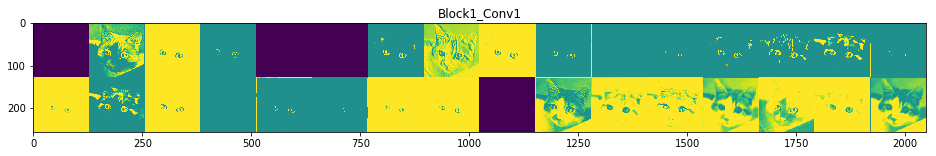

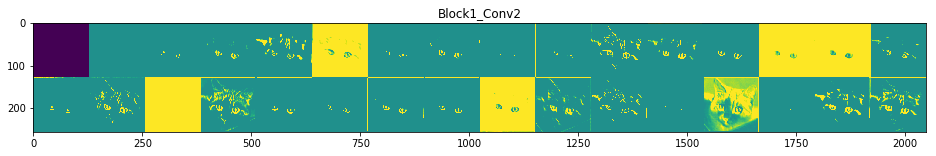

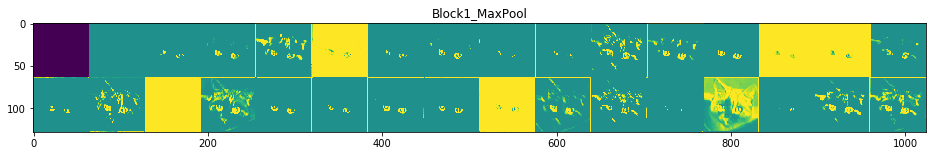

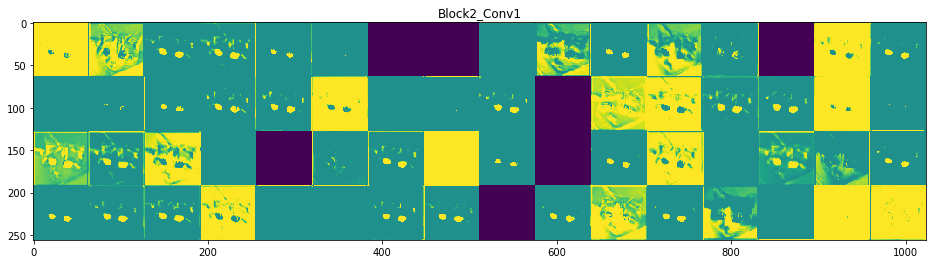

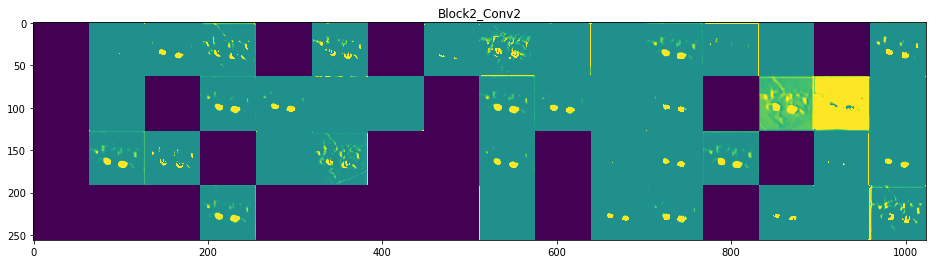

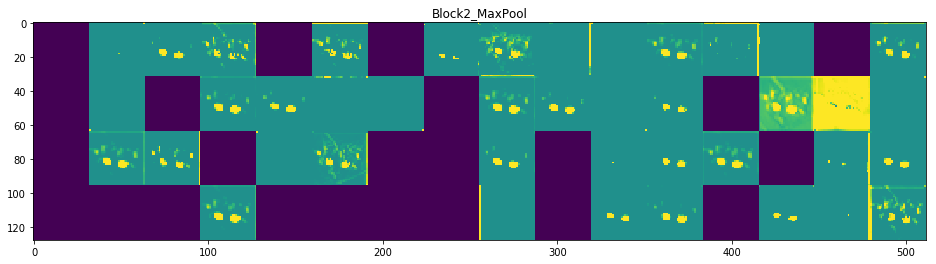

In [14]:
layer_names=[]
for layer in activation_model.layers[1:7]:
    #把每一层的名字装到列表里
    layer_names.append(layer.name)
#每行放16张图
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, acitvations):
    # region
    # 通道数
    n_features = layer_activation.shape[-1]
    # 特征图的形状为(1, size, size, n_features)
    size = layer_activation.shape[1]
    # 计算要多少行，多余的通道就舍弃了
    n_rows = n_features // images_per_row
    # 在每一层都做一个容器矩阵，用来存储所有的
    display_grid = np.zeros((size * n_rows, images_per_row * size))
    channel_idx = 0
    for row in range(n_rows):
        # 一行一行地装填
        for col in range(images_per_row):
            channel_image = layer_activation[0, :, :, channel_idx]
            channel_idx +=1
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row * size : (row + 1) * size,
                         col * size : (col + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    #endregion
plt.show()